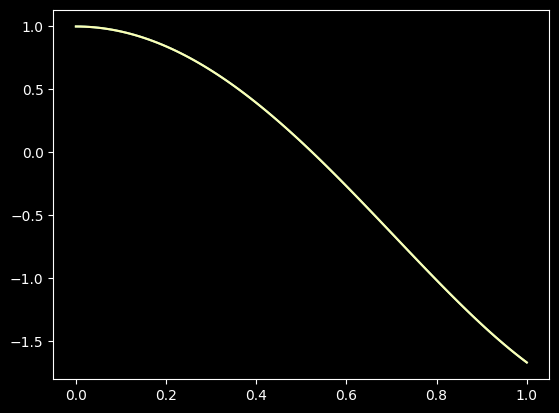

In [3]:
#10.1.3
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def ode(x, y):
    return np.array([
        y[1],
        2 * x * y[1] - 8 * y[0]
    ])

def bc(ya, yb):
    return np.array([
        ya[0] - 1,
        yb[0] + 5./3.
    ])

f_exact = lambda x: 4 / 3 * x**4 - 4 * x**2 + 1
a, b = np.finfo(float).eps, 1
x = np.linspace(a, b, 100)
w = np.ones(x.size)
dw_dx = np.ones(x.size)
y_init = np.vstack((w, dw_dx))

sol = solve_bvp(ode, bc, x, y_init)

plt.plot(sol.x, sol.y[0])
plt.plot(sol.x, f_exact(x))

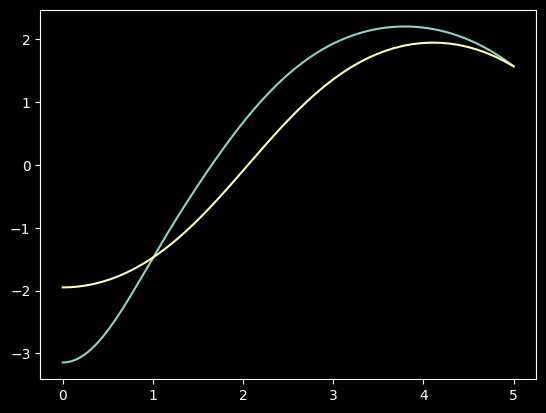

In [8]:
#10.1.4
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def ode(t, y):
    return np.array([
        y[1],
        -np.sin(y[0])
    ])

def bc(ya, yb):
    return np.array([
        ya[1],
        yb[0] - np.pi / 2
    ])

a, b = np.finfo(float).eps, 5
t = np.linspace(a, b, 50)

# 定义两个不同的初始猜测
# y_guess_1: 简单的线性猜测，倾向于找到“不经过 0”的解
y_guess_1 = np.zeros((2, t.size))
y_guess_1[0] = np.pi / 2  # 猜测角度始终在 pi/2 附近

# y_guess_2: 带有波动的猜测，倾向于找到“经过 0”的解
y_guess_2 = np.zeros((2, t.size))
y_guess_2[0] = 3 * np.cos(t) # 赋予一个初始的摆动幅度

sol1 = solve_bvp(ode, bc, t, y_guess_1)
plt.plot(sol1.x, sol1.y[0])
sol2 = solve_bvp(ode, bc, t, y_guess_2)
plt.plot(sol2.x, sol2.y[0])

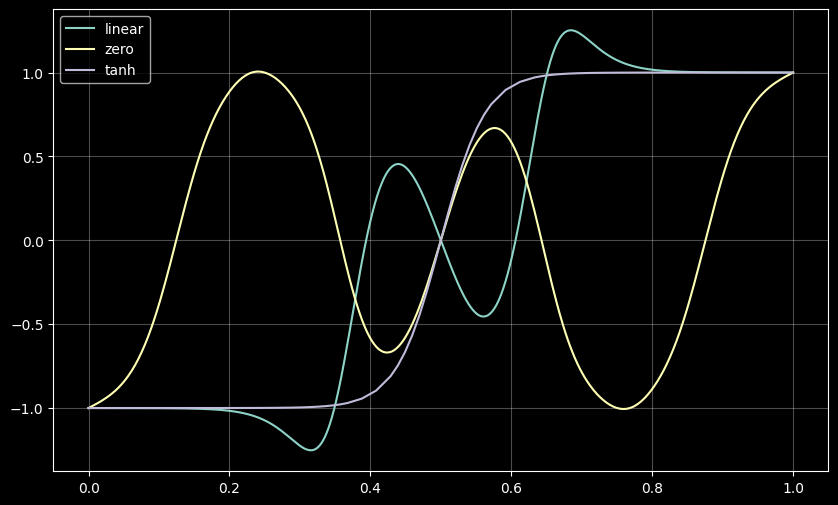

In [26]:
#10.1.5
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def ode(x, y):
    return np.array([
        y[1],
        y[0]**3/eps - y[0]/eps
    ])

def bc(ya, yb):
    return np.array([
        ya[0] + 1,
        yb[0] - 1
    ])

eps = 0.002
a, b = np.finfo(float).eps, 1
x_init = np.linspace(a, b, 50)
y_guess_linear = np.zeros((2, x_init.size))
y_guess_linear[0] = 2 * x_init - 1
y_guess_linear[1] = 2  # 导数为常数 2

plt.figure(figsize=(10, 6))
sol = solve_bvp(ode, bc, x_init, y_guess_linear)
plt.plot(sol.x, sol.y[0], label="linear")

y_guess_linear = np.zeros((2, x_init.size))
sol = solve_bvp(ode, bc, x_init, y_guess_linear)
plt.plot(sol.x, sol.y[0], label="zero")

y_guess_tanh = np.zeros((2, x_init.size))
y_guess_tanh[0] = np.tanh((x_init - 0.5) / np.sqrt(eps))
# 导数大概估一下，其实不精准也没关系，求解器会修正
y_guess_tanh[1] = (1.0/np.sqrt(eps)) * (1 - y_guess_tanh[0]**2)

sol = solve_bvp(ode, bc, x_init, y_guess_tanh)
plt.plot(sol.x, sol.y[0], label="tanh")
plt.legend()
plt.grid(True, alpha=0.3)
